In [119]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
train = pd.read_csv('../data/train.csv', index_col=0)
test = pd.read_csv('../data/test.csv', index_col=0)
#sample = pd.read_csv('../data/sample_submission.csv')

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
0,24,0,0,5,247.30,2,0,4,17,1050,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,440875,1,1,0,37.65,1,1,0,45,1072,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,878242,2,0,1,93.73,1,0,2,54,1404,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,1319841,3,0,0,95.88,0,0,0,86,1069,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,1757883,4,0,1,0.00,0,0,1,58,1034,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [4]:
train.shape

(4357336, 25)

In [5]:
train.columns

Index(['groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [6]:
train.dtypes

groupId              int64
matchId              int64
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
maxPlace             int64
numGroups            int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

(array([614372., 475328., 457099., 399614., 376165., 415510., 367145.,
        374248., 414747., 463108.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

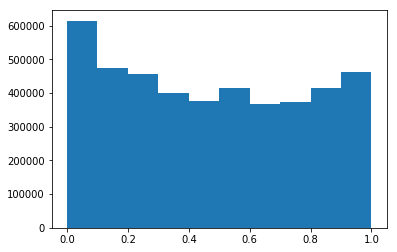

In [7]:
plt.hist(train['winPlacePerc'])

In [115]:
train.isnull().sum()

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
match_size         0
group_size         0
dtype: int64

In [116]:
test.isnull().sum()

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
match_size         0
group_size         0
dtype: int64

In [8]:
# How many groups there were for each match
train.groupby('groupId').count()['matchId'].sort_values(ascending=False)

groupId
1268134    96
1193309    93
2685082    76
737999     58
1223908    57
1504697    47
1386844    46
1025545    37
406497     37
2504627    34
26945      33
1082993    33
738000     31
1141090    31
1615912    30
824868     29
1012863    29
143202     28
1114695    28
2670943    28
189790     28
618789     27
1880096    27
818589     27
973305     26
1408719    26
1498679    26
167617     25
744195     25
1398849    25
           ..
754598      1
754597      1
754596      1
1595728     1
1595727     1
754646      1
1595716     1
754685      1
1595707     1
1595708     1
1595709     1
1595710     1
1595711     1
1595712     1
1595713     1
1595714     1
1595715     1
1595717     1
1595726     1
1595718     1
1595719     1
1595720     1
1595721     1
1595722     1
1595723     1
754663      1
1595724     1
1595725     1
754656      1
944366      1
Name: matchId, Length: 1888732, dtype: int64

## Adding "match_size" feature

In [9]:
# How many players there were for each match
train.groupby('matchId')['matchId'].count().sort_values(ascending=False)

matchId
24256    100
21074    100
46549    100
7315     100
7316     100
29815    100
4272     100
4268     100
18383    100
4265     100
29827    100
29841    100
41166    100
4233     100
42820    100
29865    100
11152    100
7329     100
4216     100
11155    100
29907    100
42827    100
21126    100
39823    100
29921    100
42124    100
4312     100
4384     100
7310     100
39901    100
        ... 
16637      9
19129      9
2280       9
45595      9
17168      9
17145      9
36647      9
15761      9
27908      9
2032       9
2018       9
41503      9
32826      9
10711      9
40678      9
1795       9
44114      9
35572      9
2394       9
32327      8
193        8
7738       8
16727      8
43601      7
2608       7
30613      7
21860      6
5702       5
5788       4
25785      1
Name: matchId, Length: 47734, dtype: int64

In [90]:
match_size_train = train.groupby('matchId')['matchId'].count()
match_size_test = test.groupby('matchId')['matchId'].count()

In [91]:
match_size_train[:5]

matchId
0    99
1    93
2    93
3    97
4    93
Name: matchId, dtype: int64

In [92]:
match_size_train = pd.DataFrame(match_size_train)
match_size_test = pd.DataFrame(match_size_test)

In [93]:
match_size_train.columns = ['match_size']
match_size_train.reset_index(inplace=True)

match_size_test.columns = ['match_size']
match_size_test.reset_index(inplace=True)

match_size_train.head()

,matchId,match_size
0,0,99
1,1,93
2,2,93
3,3,97
4,4,93


In [94]:
train.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
0,24,0,0,5,247.30,2,0,4,17,1050,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,440875,1,1,0,37.65,1,1,0,45,1072,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,878242,2,0,1,93.73,1,0,2,54,1404,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,1319841,3,0,0,95.88,0,0,0,86,1069,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,1757883,4,0,1,0.00,0,0,1,58,1034,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [95]:
train = train.merge(match_size_train, on='matchId', how='left')
test = test.merge(match_size_test, on='matchId', how='left')

In [96]:
train.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,match_size
0,24,0,0,5,247.30,2,0,4,17,1050,...,591.3,0,0.0,0,0,782.40,4,1458,0.8571,99
1,440875,1,1,0,37.65,1,1,0,45,1072,...,0.0,0,0.0,0,0,119.60,3,1511,0.0400,93
2,878242,2,0,1,93.73,1,0,2,54,1404,...,0.0,0,0.0,0,0,3248.00,5,1583,0.7407,93
3,1319841,3,0,0,95.88,0,0,0,86,1069,...,0.0,0,0.0,0,0,21.49,1,1489,0.1146,97
4,1757883,4,0,1,0.00,0,0,1,58,1034,...,0.0,0,0.0,0,0,640.80,4,1475,0.5217,93


## Adding 'group_size' feature

In [106]:
train.groupby('groupId')['groupId'].count().sort_values(ascending=False)

groupId
1268134    96
1193309    93
2685082    76
737999     58
1223908    57
1504697    47
1386844    46
1025545    37
406497     37
2504627    34
26945      33
1082993    33
738000     31
1141090    31
1615912    30
824868     29
1012863    29
143202     28
1114695    28
2670943    28
189790     28
618789     27
1880096    27
818589     27
973305     26
1408719    26
1498679    26
167617     25
744195     25
1398849    25
           ..
754598      1
754597      1
754596      1
1595728     1
1595727     1
754646      1
1595716     1
754685      1
1595707     1
1595708     1
1595709     1
1595710     1
1595711     1
1595712     1
1595713     1
1595714     1
1595715     1
1595717     1
1595726     1
1595718     1
1595719     1
1595720     1
1595721     1
1595722     1
1595723     1
754663      1
1595724     1
1595725     1
754656      1
944366      1
Name: groupId, Length: 1888732, dtype: int64

In [107]:
group_size_train = train.groupby('groupId')['groupId'].count()
group_size_test = test.groupby('groupId')['groupId'].count()

In [108]:
group_size_train[:5]

groupId
1    3
2    3
3    1
4    1
5    3
Name: groupId, dtype: int64

In [110]:
group_size_train = pd.DataFrame(group_size_train)
group_size_test = pd.DataFrame(group_size_test)

In [111]:
group_size_train.columns = ['group_size']
group_size_train.reset_index(inplace=True)

group_size_test.columns = ['group_size']
group_size_test.reset_index(inplace=True)

group_size_train.head()

,groupId,group_size
0,1,3
1,2,3
2,3,1
3,4,1
4,5,3


In [112]:
train.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,match_size
0,24,0,0,5,247.30,2,0,4,17,1050,...,591.3,0,0.0,0,0,782.40,4,1458,0.8571,99
1,440875,1,1,0,37.65,1,1,0,45,1072,...,0.0,0,0.0,0,0,119.60,3,1511,0.0400,93
2,878242,2,0,1,93.73,1,0,2,54,1404,...,0.0,0,0.0,0,0,3248.00,5,1583,0.7407,93
3,1319841,3,0,0,95.88,0,0,0,86,1069,...,0.0,0,0.0,0,0,21.49,1,1489,0.1146,97
4,1757883,4,0,1,0.00,0,0,1,58,1034,...,0.0,0,0.0,0,0,640.80,4,1475,0.5217,93


In [113]:
train = train.merge(group_size_train, on='groupId', how='left')
test = test.merge(group_size_test, on='groupId', how='left')

In [141]:
train[train.columns[:16]].head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives
0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1
1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0
2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1
3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0
4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0


In [142]:
train[train.columns[10:]].head()

,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,match_size,group_size
0,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571,99,2
1,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400,93,8
2,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407,93,3
3,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146,97,1
4,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217,93,4


In [118]:
print(train.shape)
print(test.shape)

(4357336, 27)
(1867913, 26)


## Standardizing Game Stats

- A player's stats proportional to the number of enemies will be more indicative of "goodness" as opposed to absolute stat magnitudes. Let's standardize a lot of our stats against the total size of the match, or size of the group (context depending)

Stats that I think should be standardized over match_size
- assists
- DamageDealt
- DBNOs
- headshotKills
- killPlace
- killPoints
- kills
- killStreaks
- roadKills
- winPoints

Stats that I think should be standardized over group_size
- revives
- teamKills

Stats that I think should remain absolute
- boosts
- longestKill
- maxPlace
- numGroups
- heals
- rideDistance
- swimDistance
- vehicleDestroys
- walkDistance
- weaponsAcquired

In [145]:
to_standardize_match_size = ['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'kills',
                            'killStreaks', 'roadKills', 'winPoints']

to_standardize_group_size = ['revives', 'kills']

In [146]:
for i in to_standardize_match_size:
    train[i+'_std'] = train[i] / train['match_size']
    
for i in to_standardize_group_size:
    train[i+'_std'] = train[i] / train['group_size']
    
for i in to_standardize_match_size:
    test[i+'_std'] = test[i] / test['match_size']
    
for i in to_standardize_group_size:
    test[i+'_std'] = test[i] / test['group_size']

In [149]:
train.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,damageDealt_std,DBNOs_std,headshotKills_std,killPlace_std,killPoints_std,kills_std,killStreaks_std,roadKills_std,winPoints_std,revives_std
0,24,0,0,5,247.30,2,0,4,17,1050,...,2.497980,0.020202,0.000000,0.171717,10.606061,1.000,0.010101,0.0,14.727273,0.500000
1,440875,1,1,0,37.65,1,1,0,45,1072,...,0.404839,0.010753,0.010753,0.483871,11.526882,0.125,0.010753,0.0,16.247312,0.000000
2,878242,2,0,1,93.73,1,0,2,54,1404,...,1.007849,0.010753,0.000000,0.580645,15.096774,0.000,0.000000,0.0,17.021505,0.333333
3,1319841,3,0,0,95.88,0,0,0,86,1069,...,0.988454,0.000000,0.000000,0.886598,11.020619,0.000,0.000000,0.0,15.350515,0.000000
4,1757883,4,0,1,0.00,0,0,1,58,1034,...,0.000000,0.000000,0.000000,0.623656,11.118280,0.000,0.000000,0.0,15.860215,0.000000


## Drop the columns that have been converted to standardized form for now, but may come back and keep them later

In [151]:
train.drop(to_standardize_group_size+to_standardize_match_size, axis=1, inplace=True)
test.drop(to_standardize_group_size+to_standardize_match_size, axis=1, inplace=True)

## Correlations

In [153]:
train[list(train.columns[:13])+['winPlacePerc']].corr()

,groupId,matchId,boosts,heals,longestKill,maxPlace,numGroups,rideDistance,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
groupId,1.000000,0.090547,-0.000318,-0.000606,-0.000330,-0.001978,-0.002078,-0.002865,0.000053,-0.000727,-0.000568,0.000046,0.001101,-0.000239
matchId,0.090547,1.000000,0.000164,-0.001269,0.000054,0.002195,0.002424,0.000064,0.000054,-0.000780,-0.000296,-0.000823,0.001212,0.000423
boosts,-0.000318,0.000164,1.000000,0.543742,0.423239,-0.017485,-0.017577,0.308582,0.115051,-0.001643,0.070621,0.643818,0.383074,0.618075
heals,-0.000606,-0.001269,0.543742,1.000000,0.279934,-0.067800,-0.068220,0.280616,0.082417,0.012462,0.054701,0.432847,0.313044,0.427986
longestKill,-0.000330,0.000054,0.423239,0.279934,1.000000,-0.004701,-0.005065,0.183158,0.060626,0.000846,0.067169,0.419666,0.276737,0.405800
maxPlace,-0.001978,0.002195,-0.017485,-0.067800,-0.004701,1.000000,0.997815,-0.030885,0.004407,-0.028720,-0.015402,-0.070168,-0.030841,0.034235
numGroups,-0.002078,0.002424,-0.017577,-0.068220,-0.005065,0.997815,1.000000,-0.034330,0.004516,-0.029384,-0.015937,-0.070684,-0.032151,0.035831
rideDistance,-0.002865,0.000064,0.308582,0.280616,0.183158,-0.030885,-0.034330,1.000000,0.042579,0.029739,0.113627,0.305105,0.262326,0.301220
swimDistance,0.000053,0.000054,0.115051,0.082417,0.060626,0.004407,0.004516,0.042579,1.000000,0.000409,0.008722,0.169556,0.080299,0.154889
teamKills,-0.000727,-0.000780,-0.001643,0.012462,0.000846,-0.028720,-0.029384,0.029739,0.000409,1.000000,0.127828,-0.002959,0.022374,-0.006122


In [154]:
train[train.columns[13:]].corr()

,winPlacePerc,match_size,group_size,assists_std,damageDealt_std,DBNOs_std,headshotKills_std,killPlace_std,killPoints_std,kills_std,killStreaks_std,roadKills_std,winPoints_std,revives_std
winPlacePerc,1.000000,0.009473,-0.285812,0.209389,0.274911,0.182948,0.193883,-0.722387,0.040961,0.370467,0.329631,0.025178,0.020949,0.250010
match_size,0.009473,1.000000,-0.111446,-0.280938,-0.315872,-0.276790,-0.213206,-0.004123,-0.654694,-0.024510,-0.241782,-0.026214,-0.745626,-0.008822
group_size,-0.285812,-0.111446,1.000000,0.012691,-0.051566,0.031240,-0.041081,0.203761,0.034562,-0.237786,-0.073042,-0.010144,0.035421,-0.059893
assists_std,0.209389,-0.280938,0.012691,1.000000,0.645552,0.545508,0.427320,-0.193525,0.412123,0.190458,0.402866,0.009761,0.420751,0.134564
damageDealt_std,0.274911,-0.315872,-0.051566,0.645552,1.000000,0.770516,0.736441,-0.412191,0.530361,0.551527,0.709327,0.037851,0.515953,0.182561
DBNOs_std,0.182948,-0.276790,0.031240,0.545508,0.770516,1.000000,0.578385,-0.355624,0.403779,0.334465,0.626250,0.020403,0.389212,0.186802
headshotKills_std,0.193883,-0.213206,-0.041081,0.427320,0.736441,0.578385,1.000000,-0.325738,0.384536,0.475430,0.567006,0.009633,0.373701,0.124548
killPlace_std,-0.722387,-0.004123,0.203761,-0.193525,-0.412191,-0.355624,-0.325738,1.000000,-0.069835,-0.609351,-0.711449,-0.042374,-0.008684,-0.278860
killPoints_std,0.040961,-0.654694,0.034562,0.412123,0.530361,0.403779,0.384536,-0.069835,1.000000,0.142327,0.397996,0.049963,0.925194,0.034164
kills_std,0.370467,-0.024510,-0.237786,0.190458,0.551527,0.334465,0.475430,-0.609351,0.142327,1.000000,0.597042,0.056883,0.082368,0.188508


## Save cleaned CSV

In [155]:
train.to_csv('../data/train_cleaned.csv')
test.to_csv('../data/test_cleaned.csv')

In [157]:
# Note that the test doesn't have quite as many weird 90+ group sizes like from train, may want to drop those from
# train later
test.groupby('groupId')['groupId'].count().sort_values(ascending=False).head()

groupId
1754265    58
1979475    40
1697872    40
2025882    36
2127549    35
Name: groupId, dtype: int64

## Some Modeling (pre-PCA)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error

In [161]:
train[train.columns[8:]].head()

,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,match_size,group_size,assists_std,damageDealt_std,DBNOs_std,headshotKills_std,killPlace_std,killPoints_std,kills_std,killStreaks_std,roadKills_std,winPoints_std,revives_std
0,0.0,0,0,782.40,4,0.8571,99,2,0.000000,2.497980,0.020202,0.000000,0.171717,10.606061,1.000,0.010101,0.0,14.727273,0.500000
1,0.0,0,0,119.60,3,0.0400,93,8,0.010753,0.404839,0.010753,0.010753,0.483871,11.526882,0.125,0.010753,0.0,16.247312,0.000000
2,0.0,0,0,3248.00,5,0.7407,93,3,0.000000,1.007849,0.010753,0.000000,0.580645,15.096774,0.000,0.000000,0.0,17.021505,0.333333
3,0.0,0,0,21.49,1,0.1146,97,1,0.000000,0.988454,0.000000,0.000000,0.886598,11.020619,0.000,0.000000,0.0,15.350515,0.000000
4,0.0,0,0,640.80,4,0.5217,93,4,0.000000,0.000000,0.000000,0.000000,0.623656,11.118280,0.000,0.000000,0.0,15.860215,0.000000


In [165]:
# maybe consider dropping group_size
X = train.drop(['groupId', 'matchId', 'winPlacePerc', 'match_size', 'maxPlace'], axis=1) 
y = train['winPlacePerc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [166]:
print(X_train.shape)
print(X_test.shape)

(3485868, 22)
(871468, 22)


In [168]:
linreg = LinearRegression()
linreg.fit(X_train, y_train, )

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
cross_val_score(linreg, X_train, y_train, scoring='mean_absolute_error')

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


array([-0.09633494, -0.09651471, -0.09660625])